__Permutation Test__  
Average non-pathological brain age gap vs. average pathological brain age gap

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('seaborn')

In [2]:
orig_df = pd.read_csv('/home/jovyan/220824_5fcv_huber.csv', index_col=0)

In [3]:
orig_df = orig_df[orig_df.split=='valid']

In [4]:
orig_df['gap'] = orig_df.y_true - orig_df.y_pred
orig_df_mean = orig_df.groupby('pathological').mean()
orig_mean_gap_diff = orig_df_mean.loc[False, 'gap'] - orig_df_mean.loc[True, 'gap']
orig_mean_gap_diff

-2.073600274533112

In [5]:
gaps = orig_df['gap'].to_numpy()

In [6]:
n_repetitions = 100000

In [7]:
mean_gap_diffs = []
for n in range(n_repetitions):
    choices = np.random.choice(2, len(gaps))
    gaps0 = gaps[choices==0]
    gaps1 = gaps[choices==1]
    mean_gap_diff = gaps0.mean() - gaps1.mean()
    mean_gap_diffs.append(mean_gap_diff)

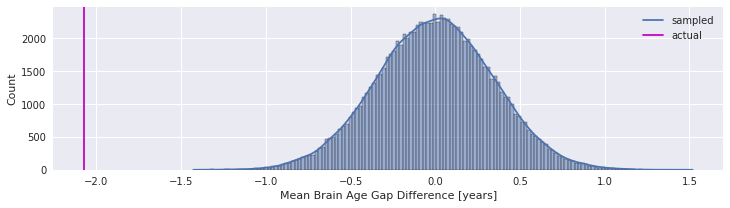

In [8]:
fig, ax = plt.subplots(1, 1, figsize=(12, 3))
ax = sns.histplot(x=mean_gap_diffs, kde=True)
ax.axvline(orig_mean_gap_diff, c='m')
ax.set_xlabel('Mean Brain Age Gap Difference [years]')
ax.legend(['sampled', 'actual'])
# fig.savefig('/home/jovyan/permutation_test.png', bbox_inches='tight', dpi=300)

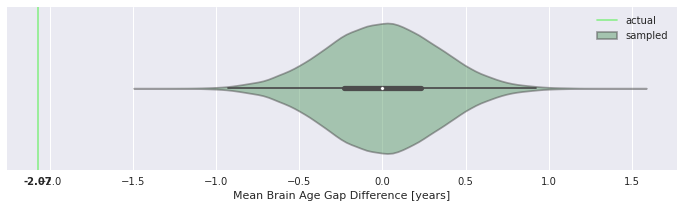

In [12]:
sns.set_color_codes('deep')
fig, ax = plt.subplots(1, 1, figsize=(12,3))
ax.axvline(orig_mean_gap_diff, c='lightgreen')
ax = sns.violinplot(x=mean_gap_diffs, kde=True, color='g')
# set violin alpha = .5
# https://github.com/mwaskom/seaborn/issues/622
from matplotlib.collections import PolyCollection
for art in ax.get_children():
    if isinstance(art, PolyCollection):
        art.set_alpha(.5)
ax.set_xlabel('Mean Brain Age Gap Difference [years]')
ax.legend(['actual', 'sampled'])
offset = .04
ax.text(orig_mean_gap_diff, ax.get_ylim()[0]+offset, f'{orig_mean_gap_diff:.2f}',
        ha='center', va='top', fontweight='bold')
# fig.savefig('/home/jovyan/permutation_test.png', bbox_inches='tight', dpi=300)

permutation test proxy acc

In [26]:
from sklearn.metrics import mean_absolute_error

In [27]:
acc = 57

In [28]:
df = pd.read_csv('/home/jovyan/220824_5fcv_huber.csv', index_col=0)
# only look at valid set
df = df[df.split == 'valid']
df = df[df.subset=='mixed']

In [29]:
mean_absolute_error(df.y_true, df.y_pred)

9.395337378707762

In [30]:
df['gap'] = df.y_true - df.y_pred

In [31]:
df['proxy'] = df['gap'] > 7.7

In [32]:
acc = (df.proxy == df.pathological).mean() * 100

In [33]:
acc

57.705161529892315

In [34]:
df.proxy.value_counts()

False    1968
True      725
Name: proxy, dtype: int64

In [35]:
n_repetitions = 100000

In [36]:
accs = []
for n in range(n_repetitions):
    choices = np.random.choice(2, len(df))
    accs.append((choices == df.pathological).mean()*100)

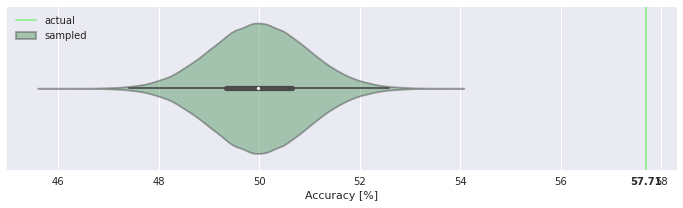

In [47]:
# TODO: move to decode_tueg.py
fig, ax = plt.subplots(1, 1, figsize=(12, 3))
ax.axvline(acc, c='lightgreen')
ax = sns.violinplot(x=accs, kde=True, color='g')
# set violin alpha = .5
# https://github.com/mwaskom/seaborn/issues/622
from matplotlib.collections import PolyCollection
for art in ax.get_children():
    if isinstance(art, PolyCollection):
        art.set_alpha(.5)
ax.set_xlabel('Accuracy [%]')
ax.legend(['actual', 'sampled'])
offset = .04
ax.text(acc, ax.get_ylim()[0]+offset, f'{acc:.2f}',
        ha='center', va='top', fontweight='bold')
# fig.savefig('/home/jovyan/permutation_test_proxy.png', bbox_inches='tight', dpi=300)